# Pandas #

Se trata de una librería para análisis de datos en Python inspirada por R. Con el tiempo ha ido ganando popularidad, y de mantenerse la tendencia superará incluso R.

Dispone de las siguientes funcionalidades.

* Un tipo DataFrame para la manipulación de datos con indexación integrada
* Herramientas para la lectura y conversión de datos en múltiples formatos
* Manejo automático de campos y datos vacíos
* Pivotado de conjuntos de datos.
* Slicing, fancy indexing y fácil extracción de subconjuntos de grandes datasets
* Inserción y borrado de columnas.
* Operaciones *groupby* eficientes con *split-apply-combine*
* Unión y combinación de Datasets.
* Indexación jerárcica para trabajar con dimensiones virtuales en los datos
* Análisis avanzado de series temporales
* Se integra bien con el ecosistema de análisis de datos y cálculo numérico de Python (numpy, scipy, matplotlib...)

Pandas fue desarrollado por Wes McKinney cuando trabajaba para AQR Capital Management, y cuenta con bastante arraigo dentro del sector del análisis financiero en EEUU y UK.

In [1]:
import pandas as pd
import numpy as np

In [2]:
trends = pd.read_csv('./data/20160819_OlympicSportsByCountries.csv',
                     header=1)
trends.head()

,Country,Search Interest,Sport
0,Iran,1,Archery
1,South Korea,2,Archery
2,Mexico,1,Archery
3,Netherlands,1,Archery
4,Aruba,16,Artistic gymnastics


In [3]:
trends[trends.Country == "Spain"].sort_values(by="Search Interest",
                                              ascending=False)

,Country,Search Interest,Sport
1240,Spain,19,Tennis
1035,Spain,9,Swimming
222,Spain,7,Athletics (Track & Field)
428,Spain,6,Basketball
49,Spain,5,Artistic gymnastics
378,Spain,3,Badminton
486,Spain,1,Beach volleyball
518,Spain,1,Canoeing
538,Spain,1,Cycling
591,Spain,1,Diving


In [4]:
trends[trends.Sport == "Tennis"].sort_values(by="Search Interest",
                                             ascending=False
                                            ).head()

,Country,Search Interest,Sport
1312,Puerto Rico,78,Tennis
1202,Argentina,38,Tennis
1339,Uruguay,24,Tennis
1240,Spain,19,Tennis
1291,Montenegro,16,Tennis


In [5]:
interesting_sports = pd.DataFrame(
    [(sport, len(data)) for sport, data in trends.groupby("Sport")]
)
interesting_sports.columns=["Sport", "Countries interested"]
interesting_sports.sort_values(by="Countries interested", ascending=False)

,Sport,Countries interested
2,Athletics (Track & Field),201
24,Swimming,190
1,Artistic gymnastics,163
13,Football (Soccer),161
28,Tennis,150
4,Basketball,69
9,Diving,64
17,Judo,55
8,Cycling,46
3,Badminton,38


In [6]:
trends[trends.Sport == "Trampolining"]

,Country,Search Interest,Sport
1347,Canada,1,Trampolining


Rosie McLennan (Canadá) ganó el oro femenino en gimnasia de trampolín

In [7]:
medalists = pd.read_csv(
    './data/Summer Olympic medallists 1896 to 2008 - ALL MEDALISTS.csv',
    header=4)
medalists.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


# Medallas que España obtuvo en los juegos de Barcelona clasificados por deporte y sexo #

In [8]:
filtered = medalists[(medalists.NOC == 'ESP') & (medalists.Edition == 1992)]
filtered[["Discipline", "Event", "Gender", "Medal"]].groupby(
    ["Discipline", "Event", "Gender", "Medal"]
).count()

Empty DataFrame
Columns: []
Index: [(Archery, team (FITA Olympic round - 70m), Men, Gold), (Athletics, 1500m, Men, Gold), (Athletics, 20km walk, Men, Gold), (Athletics, decathlon, Men, Silver), (Athletics, pole vault, Men, Bronze), (Boxing, 54 - 57kg (featherweight), Men, Silver), (Cycling Track, 1km time trial, Men, Gold), (Football, football, Men, Gold), (Hockey, hockey, Women, Gold), (Judo, 48 - 52kg (half-lightweight), Women, Gold), (Judo, 52 - 56kg (lightweight), Women, Gold), (Rhythmic G., individual all-round, Women, Silver), (Sailing, 470 - Two Person Dinghy, Men, Gold), (Sailing, 470 - Two Person Dinghy, Women, Gold), (Sailing, flying dutchman, Men, Gold), (Sailing, single-handed dinghy (Europe), Women, Silver), (Sailing, single-handed dinghy (Finn), Men, Gold), (Swimming, 200m backstroke, Men, Gold), (Tennis, doubles, Women, Silver), (Tennis, singles, Men, Silver), (Tennis, singles, Women, Bronze), (Water polo, water polo, Men, Silver)]

# Evolución del numero de medallistas totales españoles #

<IPython.core.display.Javascript object>


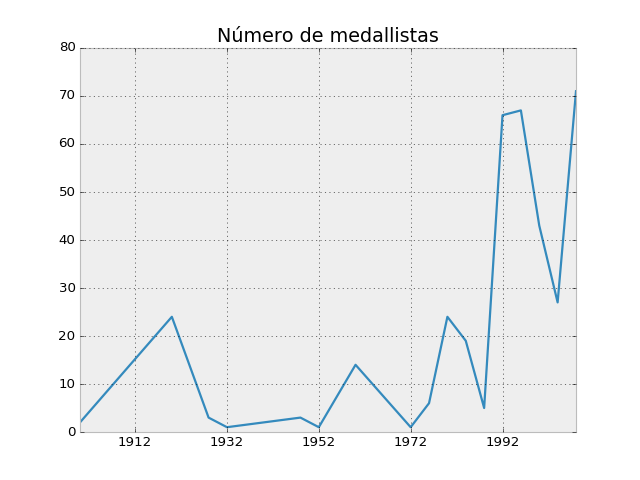

In [9]:
import matplotlib.pyplot as plt
plt.style.use("bmh")
from datetime import date
%matplotlib notebook

medalists_list = list()
for edition, data in medalists[medalists.NOC == 'ESP'].groupby('Edition'):
    medalists_list.append((date(year=edition, month=1, day=1), len(data)))
    
timevol = pd.Series([pair[1] for pair in medalists_list],
                    index=[pair[0] for pair in medalists_list])
timevol.plot(title='Número de medallistas')

# Data wrangling #

Data wrangling es la conversión del formato de los datos para que sean más fáciles de procesar posteriormente. Habitualmente se pasa de datos sin estructura a datos con algún esquema.

![](https://whatsthebigdata.files.wordpress.com/2016/05/time.jpg?w=640)
![](https://whatsthebigdata.files.wordpress.com/2016/05/least-enjoyable.jpg?w=640)

(https://whatsthebigdata.com/2016/05/01/data-scientists-spend-most-of-their-time-cleaning-data/)

Pandas es quizás la herramienta con la que es más sencillo manipular y transformar datos desestructurados, que es sin duda una de las tareas más desagradecidas y laboriosas de la profesión de analista de datos.

# SQL #

In [10]:
import sqlite3
conn = sqlite3.connect('data/medalists.db')
c = conn.cursor()

In [11]:
c.execute("SELECT * FROM medalists WHERE NOC = 'ESP' LIMIT 5")
for row in c.fetchall():
    print(row)

(306, 'Paris', 1900, 'Basque Pelota', 'Basque Pelota', 'De AMEZOLA y ASPIZUA, José', 'ESP', 'Men', 'cesta punta', 'M', 'Gold')
(307, 'Paris', 1900, 'Basque Pelota', 'Basque Pelota', 'VILLOTA BAQUIOLA, Francisco', 'ESP', 'Men', 'cesta punta', 'M', 'Gold')
(3315, 'Antwerp', 1920, 'Football', 'Football', 'ACEDO, Domingo', 'ESP', 'Men', 'football', 'M', 'Silver')
(3316, 'Antwerp', 1920, 'Football', 'Football', 'ARABOLAZA, Patricio', 'ESP', 'Men', 'football', 'M', 'Silver')
(3317, 'Antwerp', 1920, 'Football', 'Football', 'ARRATE, Mariano', 'ESP', 'Men', 'football', 'M', 'Silver')


In [12]:
query = """SELECT Edition, Event, Athlete, Gender FROM medalists
        WHERE NOC = 'ESP'
        ORDER BY Edition ASC
        LIMIT 5
"""
c.execute(query)
for row in c.fetchall():
    print(row)

(1900, 'cesta punta', 'De AMEZOLA y ASPIZUA, José', 'Men')
(1900, 'cesta punta', 'VILLOTA BAQUIOLA, Francisco', 'Men')
(1920, 'football', 'ACEDO, Domingo', 'Men')
(1920, 'football', 'ARABOLAZA, Patricio', 'Men')
(1920, 'football', 'ARRATE, Mariano', 'Men')


In [13]:
query = """SELECT Discipline, Event, Gender, Medal FROM medalists
    WHERE NOC = 'ESP' AND Edition = 1992
    GROUP BY Discipline, Event, Gender, Medal
"""
c.execute(query)
for row in c.fetchall():
    print(row)

#filtered = medalists[(medalists.NOC == 'ESP') & (medalists.Edition == 1992)]
#filtered[["Discipline", "Event", "Gender", "Medal"]].groupby(
#    ["Discipline", "Event", "Gender", "Medal"]
#).count()

('Archery', 'team (FITA Olympic round - 70m)', 'Men', 'Gold')
('Athletics', '1500m', 'Men', 'Gold')
('Athletics', '20km walk', 'Men', 'Gold')
('Athletics', 'decathlon', 'Men', 'Silver')
('Athletics', 'pole vault', 'Men', 'Bronze')
('Boxing', '54 - 57kg (featherweight)', 'Men', 'Silver')
('Cycling Track', '1km time trial', 'Men', 'Gold')
('Football', 'football', 'Men', 'Gold')
('Hockey', 'hockey', 'Women', 'Gold')
('Judo', '48 - 52kg (half-lightweight)', 'Women', 'Gold')
('Judo', '52 - 56kg (lightweight)', 'Women', 'Gold')
('Rhythmic G.', 'individual all-round', 'Women', 'Silver')
('Sailing', '470 - Two Person Dinghy', 'Men', 'Gold')
('Sailing', '470 - Two Person Dinghy', 'Women', 'Gold')
('Sailing', 'flying dutchman', 'Men', 'Gold')
('Sailing', 'single-handed dinghy (Europe)', 'Women', 'Silver')
('Sailing', 'single-handed dinghy (Finn)', 'Men', 'Gold')
('Swimming', '200m backstroke', 'Men', 'Gold')
('Tennis', 'doubles', 'Women', 'Silver')
('Tennis', 'singles', 'Men', 'Silver')
('Tennis

In [14]:
table = pd.read_sql(query, conn)
table

,Discipline,Event,Gender,Medal
0,Archery,team (FITA Olympic round - 70m),Men,Gold
1,Athletics,1500m,Men,Gold
2,Athletics,20km walk,Men,Gold
3,Athletics,decathlon,Men,Silver
4,Athletics,pole vault,Men,Bronze
5,Boxing,54 - 57kg (featherweight),Men,Silver
6,Cycling Track,1km time trial,Men,Gold
7,Football,football,Men,Gold
8,Hockey,hockey,Women,Gold
9,Judo,48 - 52kg (half-lightweight),Women,Gold


# ¿Quién me dice la diferencia entre la clasificación hecha con Pandas y la query SQL? #

In [15]:
conn.close()